Linear Least Squares
========

# Theory
**Least Squares (LS)** is a curve fitting method that is primarily estimate the parameters of a chosen model function to best approximate the general trend of a given data set.

## Definition
**Least Squares (LS)** strategy to estimate the model function parameters, that best fit the data; is to minimize the sum of the squares of the residuals (a residual being the error between the observed value provided by data and the fitted value provided by a model function).

Formally, the minimization problem that **LS** presented is
$$
\begin{equation}
\text{LS} := \min \sum_{i=1}^n r_i^2 \qquad \text{,where} \quad r_i = \hat{f}(\mathbf{x}_i\,, \beta) - y_i
\end{equation}$$

where for a data set of $n$ points $(\mathbf{x}, y)$, a model function $(\hat{f}(\mathbf{x}, \beta))$, and a residual (r). We want to find parameters $\beta$ that minimize the sum of the squared residuals above.

> To elaborate  more, **LS** method view the parameters $\beta$ as the variables and $\mathbf{x}$ data points as given constant weights in the model function, hence the minimization stepup would solve for $\beta$. For this to work the number of data points $n$ has to be greater than or equal to the number of parameters of the model function.

**Linear Least Squares (LLS)** is a type of **LS** method that deals with the category of model functions that their parameters $\beta$ are independent and linearly combined. The general form such model functions is
$$
\begin{equation}
\hat{f}(\mathbf{x}, \beta) = \beta_1 \phi_1(\mathbf{x}) + \beta_2 \phi_2(\mathbf{x}) + \dots + \beta_n \phi_n(\mathbf{x})
\end{equation}$$

A valid example of such model function
$$
\begin{equation*}
\hat{f}(\mathbf{x},\beta) = \beta_1 + \beta_2 \mathbf{x} + \beta_3 \mathbf{x}^2 + \beta_4 \sin(4\mathbf{x}) + \beta_5 \ln(2\mathbf{x})
\end{equation*}$$

To solve for optimal $\beta$ in **LLS**, there is two approach to achieve this minimization task
- Exploiting linear algebra concepts
- Exploiting multivariate calculus concepts

### Linear Algebra Approach  
Lets write explicitly the linear system, since $\beta$ are linearly combined; of residuals equations
$$
\begin{align*}
\overbrace{\beta_1 \phi_1(\mathbf{x}_1) + \beta_2 \phi_2(\mathbf{x}_1) + \dots + \beta_n \phi_n(\mathbf{x}_1) \vphantom{\Large f^{(k)}}}^{\normalsize \hat{f}(\mathbf{x}, \beta)} - \overbrace{y_1 \vphantom{\Large f^{(k)}}}^{\normalsize y_i} \; &= \overbrace{r_1 \vphantom{\Large f^{(k)}}}^{\normalsize r_i} \\[5pt]
\beta_1 \phi_1(\mathbf{x}_2) + \beta_2 \phi_2(\mathbf{x}_2) + \dots + \beta_n \phi_n(\mathbf{x}_2) - y_2 &= r_2 \\[5pt]
\beta_1 \phi_1(\mathbf{x}_m) + \beta_2 \phi_2(\mathbf{x}_m) + \dots + \beta_n \phi_n(\mathbf{x}_m) - y_m \; &= \;\,r_m
\end{align*}$$

This system of linear equations can be expressed in matrix form
$$
\begin{equation*}
\textbf{A} \vec{\beta} - \vec{y} = \vec{r}
\end{equation*}$$

where $\textbf{A} = \phi_i(\mathbf{x}_j) \in \mathbb{R}^{m \times n}$ is the constant weights matrix (model matrix), $\vec{\beta} \in \mathbb{R}^{n}$ model parameters vector, $\vec{y} \in \mathbb{R}^{m}$ observed values vector, and $\vec{r} \in \mathbb{R}^{m}$ is residuals vector. The minimization process in this approach is based on the following idea,
> If the minimization process proved that $$|r|_2 = \sqrt{r_1^2 + r_2^2 + \dots + r_3^2}$$ is minimal, then this imply that $$\sum_{i=1}^n r_i^2 = r_1^2 + r_2^2 + \dots + r_3^2$$ is also minimal, hence the **least-squares problem is solved**.


#### Graphical Representation
To understand the minimization process in this approach, lets investigate the visual representation of simple version of this linear system. Lets consider a problem in $2\text{D}$ of fitting a straight line to 3 data points $\lbrace (x_1, y_1), (x_2, y_2), (x_3, y_3) \rbrace$. The expected model function is in the form 
$$
\hat{f}(x, \beta) = \beta_1 x + \beta_2
$$

And the linear system of residuals equations reads 
$$
\begin{align*}
\beta_1 x_1 + \beta_2 - y_1 &= r_1 \\[5pt]
\beta_1 x_2 + \beta_2 - y_2 &= r_2 \\[5pt]
\beta_1 x_3 + \beta_2 - y_3 &= r_3 \\[5pt]
\end{align*}$$

In matrix form
$$
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2
\end{bmatrix}
- 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
=
\begin{bmatrix}
r_1 \\
r_2 \\
r_3
\end{bmatrix}
$$

The linear combination of the two column vectors of matrix $\textbf{A}$ "i.e. $\beta_1 \vec{a}_1 + \beta_2 \vec{a}_2$" span a plane in $\mathbb{R}^3$, since the column vectors live in $\mathbb{R}^3$. The linear combination is factored by the parameters, hence each point in this plane correspond to the prediction of a model function with some parameters $(\beta_1, \beta_2)$. This can be expressed graphically
<div style="text-align:center"><img src="./Resources/Least Squares - column vector plane.png" width="600"/></div>

Now if we consider the observation vector $(y)$ and residuals vector $(r)$ in our system. One can estimate the parameters of the model function $(\beta_1, \beta_2)$ by finding the linear combination of the column vectors $\beta_1 \vec{a}_1 + \beta_2 \vec{a}_2$ that minimize the euclidean length of $r$.
> In general terms,there is two cases
> - $(y)$ lie **in the plane** constructed by $a_1$ and $a_2$, then one can find linear combination, with parameter $(\beta_1, \beta_2)$ that predict $(y)$ exactly "i.e. the model function pass through all points", which in this case the length of vector $(r)$ is zero. This case only happen under the condition, $$ \text{number of parameter} = \text{number of points}$$ In this case one can solve the system of equations directly, since matrix $\textbf{A}$ will be square hence invertible.
> - $(y)$ is **outside the plane** constructed by $a_1$ and $a_2$, then the Euclidean length of $r$ is minimized is when $r$ is perpendicular to the plane. One can find the linear combination, with parameter $(\beta_1, \beta_2)$ that make this statement true. (*See the two figures below*) $$r \perp \hat{y}$$

<div style="text-align:center">
    <img src="./Resources/Least Squares - residual equation.png" width="400" />
    <img src="./Resources/Least Squares - normal equation.png" width="400" />
</div>

For the second case, starting from the condition $r \perp \hat{y}$ one will construct a new set of equations called system of normal equations that will allow us to solve for $\vec{\beta}$. The condition $r \perp \hat{y}$ imply that $r$ is also perpendicular to the plane and any vector inside it. Since the dot product between and two perpendicular vectors is zero one can write the following
$$
\begin{align*}
\vec{a}_1 \cdot \vec{r} &= 0\\
\vec{a}_2 \cdot \vec{r} &= 0
\end{align*}$$

Substituting $\vec{r}$ with $\vec{a_1} \beta_1 + \vec{a_2} \beta_2 - \vec{y}$, the system of equation reads
$$
\begin{align*}
(\vec{a}_1 \cdot \vec{a}_1) \, \beta_1 + (\vec{a}_1 \cdot \vec{a}_2) \, \beta_2 - (\vec{a}_1 \cdot \vec{y}) &= 0\\
(\vec{a}_2 \cdot \vec{a}_1) \, \beta_1 + (\vec{a}_2 \cdot \vec{a}_2) \, \beta_2 - (\vec{a}_2 \cdot \vec{y}) &= 0
\end{align*}$$

This system of equations is called the normal equations. Notice that the system matrix of the normal equations is symmetric, due to the commutative property of the dot product "i.e. $(\vec{a}_1 \cdot \vec{a_2}) = (\vec{a}_2 \cdot \vec{a_1})$". Expressing the system in matrix form 
$$
\begin{equation*}
\textbf{A}_* \vec{\beta} = \vec{b}
\end{equation*}$$

Where 
$$
\begin{align*}
\textbf{A}_* &= \textbf{A}^\intercal \; \textbf{A}
=
\begin{bmatrix}
(\vec{a}_1 \cdot \vec{a}_1) & \cdots & (\vec{a}_1 \cdot \vec{a}_n) \\
\vdots                      & \ddots & \vdots                      \\
(\vec{a}_n \cdot \vec{a}_1) & \cdots & (\vec{a}_n \cdot \vec{a}_n)
\end{bmatrix},

\qquad&

\vec{b} &=
\begin{bmatrix}
(\vec{a}_1 \cdot \vec{y}) \\
\vdots \\
(\vec{a}_n \cdot \vec{y})
\end{bmatrix}
\end{align*}$$

This system of equations can be solved directly, since matrix $\textbf{A}_*$ is square hence invertible.


### Multivariate Calculus Approach

## Examples


# Implementation


## Imports

In [31]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [60]:
N = 50                      # number of data points
a, b = [0,10]               # fitting interval
f = lambda x: x**3          # data general trend

## Algorithm



In [61]:
def LS(points: list[float, float], order: int =1) -> tuple[Callable, list[Callable]]:
    '''
    Least squares method to estimate the optimal parameters of model function that fit a given 
    data points. The method exploited linear algebra concepts to solve this problem.

    Args:
        points: Set of data points
        order: The order of the model function

    Returns:
        The estimated parameters
    '''

    # error equations components "i.e. Ax - c = errors"
    column_vectors = [points[:,0]**n for n in range(order,-1,-1)]
    A = np.column_stack(column_vectors)
    y = points[:,1]
    
    # normal equations components "i.e. A*x = b"
    A_star = np.dot(A.T,A)
    b = np.dot(A.T,y)
    
    beta = np.linalg.solve(A_star, b)

    return beta

## Results Visualization


In [65]:
# generate data points
x = np.linspace(a, b, num=N)
points = np.stack( (x + 2*np.random.rand(N), f(x) + 3*np.random.rand(N)), axis=1 )

# solve least squares problem
beta_1= LS(points, order=1)
beta_2= LS(points, order=2)

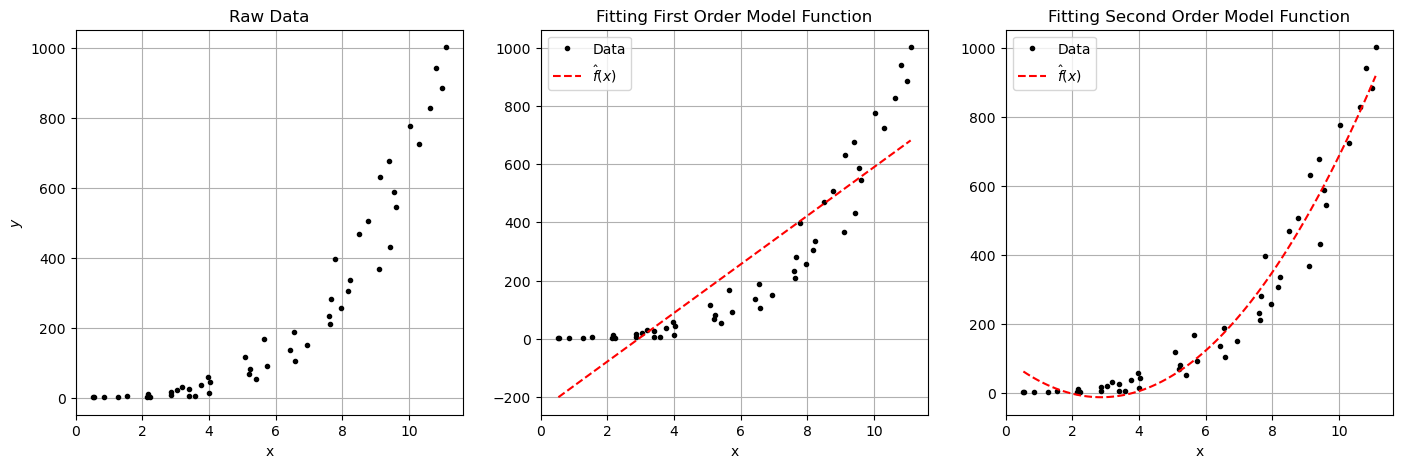

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))

# fine domain
x = np.linspace(min(points[:,0]), max(points[:,0]), num=100)

# raw data plot
ax[0].plot(points[:,0], points[:,1], "k.")
ax[0].set(xlabel="x", ylabel=r"$y$", title="Raw Data")
ax[0].grid(True)

# first order model function plot
ax[1].plot(points[:,0], points[:,1], "k.", label="Data")
ax[1].plot(x, beta_1[0]*x + beta_1[1], "r--", label="$\hat{f}(x)$")
ax[1].set(xlabel="x", title="Fitting First Order Model Function")
ax[1].grid(True)
ax[1].legend()

# second order model function plot
ax[2].plot(points[:,0], points[:,1], "k.", label="Data")
ax[2].plot(x, beta_2[0]*x**2 + beta_2[1]*x + beta_2[2], "r--", label="$\hat{f}(x)$")
ax[2].set(xlabel="x", title="Fitting Second Order Model Function")
ax[2].grid(True)
ax[2].legend()

plt.show()